# Entrainement d'un modèle

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

In [17]:
data_hotel = pd.read_csv("clean_data_unnormalized.csv")
data_hotel.head()

,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,224,10,0,65.00,0,2,3,0.0,0.0,0.0,1.0,0.0,1.0
1,5,11,0,106.68,1,2,5,0.0,0.0,0.0,0.0,1.0,1.0
2,1,2,0,60.00,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,211,5,0,100.00,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0
4,48,4,0,94.50,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
X = data_hotel.drop(['booking_status_Not_Canceled'], axis=1)
y = data_hotel['booking_status_Not_Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVM

Accuracy :  0.7786195286195287
Precision :  0.7791940789473685
Rappel :  0.940213346564128


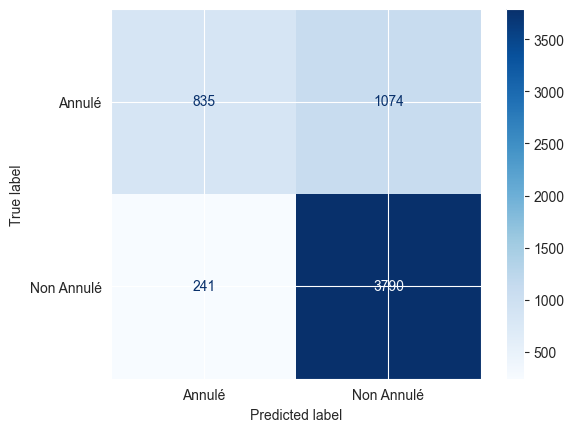

In [19]:
svm = SVC()

#Entraînement
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

#Test
print("Accuracy : ", svm.score(X_test, y_test))
print("Precision : ", precision_score(y_test, y_pred))
print("Rappel : ", recall_score(y_test, y_pred))



# Afficher la matrice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Annulé', 'Non Annulé'])
disp.plot(cmap='Blues')


In [ ]:
noyaux = ['linear', 'poly', 'rbf', 'sigmoid']

accuracies = []
precisions = []
recalls = []

for n in noyaux:
    svm = SVC(kernel=n)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

plt.plot(noyaux, accuracies, label='Accuracy')
plt.plot(noyaux, precisions, label='Precision')
plt.plot(noyaux, recalls, label='Rappel')
plt.xticks(noyaux)
plt.xlabel('Noyau utilisé')
plt.ylabel('Score')
plt.legend()
plt.show()

pos_meilleur_noyau = np.argmax(accuracies)
meilleur_noyau = noyaux[pos_meilleur_noyau]
print("Noyau optimal : ", meilleur_noyau)
print("Accuracy du noyau", meilleur_noyau, ": ", accuracies[pos_meilleur_noyau])
print("Précision du noyau", meilleur_noyau, ": ", precisions[pos_meilleur_noyau])
print("Rappel du noyau", meilleur_noyau, ": ", recalls[pos_meilleur_noyau])

## Resultat:

Meilleur accuracy:  0.8354
Meilleure précision : 0.847
Meilleur rappel rbf :  0.9189


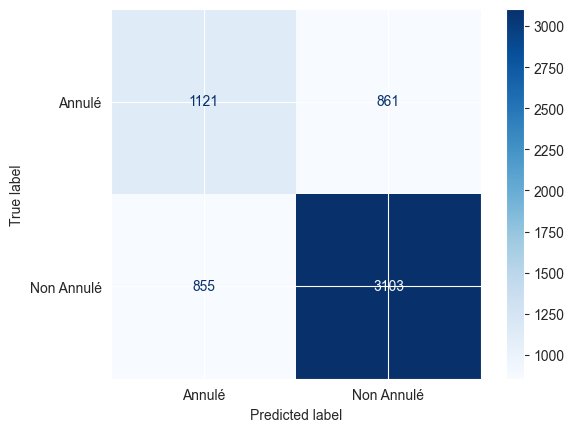

In [12]:
# Afficher la matrice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Annulé', 'Non Annulé'])
disp.plot(cmap='Blues')
print("Meilleur accuracy: ", round(accuracies[pos_meilleur_noyau], 4))
print("Meilleure précision :", round(precisions[pos_meilleur_noyau],4))
print("Meilleur rappel", meilleur_noyau, ": ", round(recalls[pos_meilleur_noyau],4))

# Comparaison normalisé et non normalisé

Normalisé:
- Meilleur accuracy:  0.8354
- Meilleure précision : 0.847
- Meilleur rappel rbf :  0.9189
Non normalisé:
